<a href="https://colab.research.google.com/github/Sharmila2502/Aerial-Object-Classification-Detection/blob/main/f_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
extracted="image_dataset"
os.mkdir(extracted)

In [ ]:
filename="food-10.zip"

In [ ]:
import zipfile
with zipfile.ZipFile(filename,'r') as zip_ref:
  zip_ref.extractall(extracted)

In [ ]:
import torch,torchvision

In [ ]:
from torchvision import transforms

In [ ]:
import os
labels=os.listdir('image_dataset/food-10/images')

In [ ]:
labels

['cannoli',
 'clam_chowder',
 'foie_gras',
 'crab_cakes',
 'french_onion_soup',
 'dumplings',
 'chocolate_mousse',
 'frozen_yogurt',
 'ceviche',
 'beef_tartare']

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
import os

    # Define input and output paths
input_folder = "image_dataset/food-10/images" # Folder containing 10 subfolders (one for each class)
output_folder = "image_dataset"

    # Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

    # Split the dataset (e.g., 80% train, 20% test)
    # You can also add a validation set by providing a third ratio element
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2), group_prefix=None)

Copying files: 10000 files [00:07, 1275.49 files/s]


In [ ]:
import os
train_dir = os.path.join(output_folder, "train")
test_dir = os.path.join(output_folder, "test")

print("Train set data points:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"  ├── {class_name}: {num_images} images")

print("\nTest set data points:")
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"  ├── {class_name}: {num_images} images")


Train set data points:
  ├── cannoli: 800 images
  ├── clam_chowder: 800 images
  ├── foie_gras: 800 images
  ├── crab_cakes: 800 images
  ├── french_onion_soup: 800 images
  ├── dumplings: 800 images
  ├── chocolate_mousse: 800 images
  ├── frozen_yogurt: 800 images
  ├── ceviche: 800 images
  ├── beef_tartare: 800 images

Test set data points:
  ├── cannoli: 200 images
  ├── clam_chowder: 200 images
  ├── foie_gras: 200 images
  ├── crab_cakes: 200 images
  ├── french_onion_soup: 200 images
  ├── dumplings: 200 images
  ├── chocolate_mousse: 200 images
  ├── frozen_yogurt: 200 images
  ├── ceviche: 200 images
  ├── beef_tartare: 200 images


In [ ]:
import torchvision.transforms as transforms
preprocess = transforms.Compose([transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.RandomGrayscale(p=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])])

In [ ]:
test_preprocess = transforms.Compose([transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])])

In [ ]:
from torchvision import datasets
train_data=datasets.ImageFolder(root='/content/image_dataset/train',transform=preprocess)

In [ ]:
test_data=datasets.ImageFolder(root='/content/image_dataset/test',transform=test_preprocess)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: /content/image_dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               RandomCrop(size=(224, 224), padding=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
               RandomGrayscale(p=0.05)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/image_dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

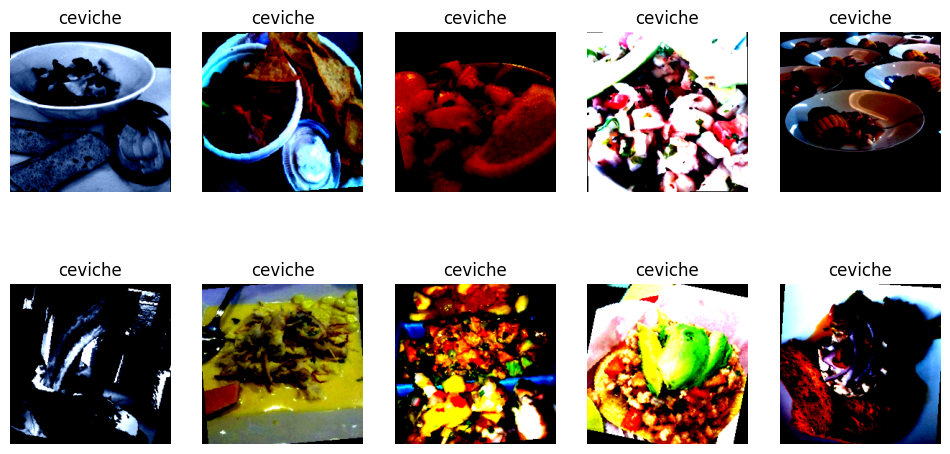

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_data[i+2000][0].permute(1, 2, 0))
  plt.title(train_data.classes[train_data[i+2000][1]])
  plt.axis("off")

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_set=DataLoader(train_data,batch_size=64,shuffle=True)

In [ ]:
test_set=DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
train_iter=iter(train_set)
image,labels=next(train_iter)

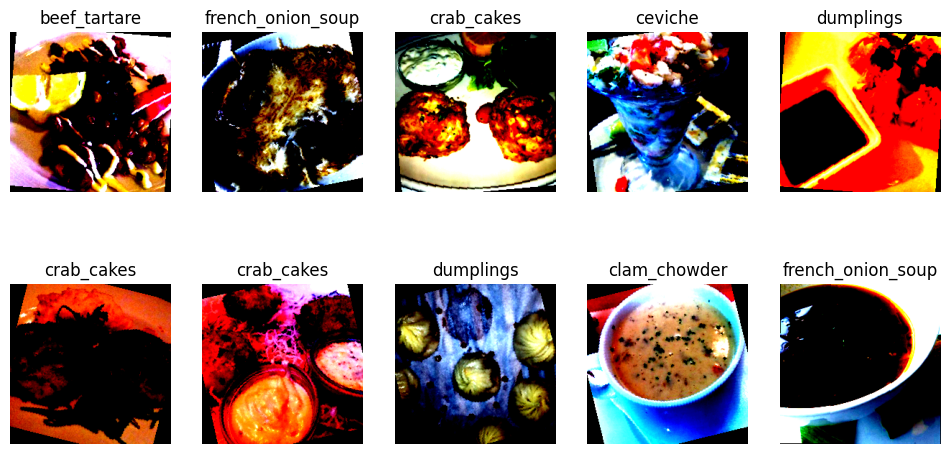

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(image[i].permute(1, 2, 0))
  plt.title(train_data.classes[labels[i]])
  plt.axis("off")

In [ ]:
import torchvision.models as model

In [ ]:
model=model.resnet50(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 10)  # Adjust the final layer for Food-10
model.load_state_dict(torch.load("final_model.pth", map_location=torch.device('cpu')))
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model=model.resnet50(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for each in model.parameters():
  each.requires_grad=False

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
model.fc=nn.Linear(model.fc.in_features,10)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torch.optim import AdamW

In [ ]:
criterian=nn.CrossEntropyLoss()
optimizer=AdamW(model.parameters(),lr=0.001,weight_decay=0.01)

In [ ]:
# StepLR - reduces learning rate by a factor at specified intervals
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.2)

In [ ]:
from tqdm.auto import tqdm, trange

In [ ]:
num_epochs = 10  # Example number of epochs
for epoch in trange(num_epochs, desc="Epochs"):
  model.train()
  correct_train = 0
  total_train = 0
  runn_loss=[]
  train_Accuracy=[]
  for batch_idx, (val, lab) in tqdm(enumerate(train_set), total=len(train_set), desc=f"Training Epoch {epoch+1}"):

    optimizer.zero_grad()
    output=model(val)
    loss=criterian(output,lab)
    loss.backward()
    optimizer.step()


    _, predicted = torch.max(output.data, 1)
    total_train += labels.size(0)
    correct_train += (predicted == lab).sum().item()

  scheduler.step()
  train_Accuracy.append(100 * correct_train / total_train)
  runn_loss.append(loss.item())
  print('Epoche',epoch+1, 'Loss',loss.item(), 'Accuracy', 100 * correct_train / total_train)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training Epoch 1:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 1 Loss 1.0037957429885864 Accuracy 61.175


Training Epoch 2:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 2 Loss 0.7614437341690063 Accuracy 73.5875


Training Epoch 3:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 3 Loss 0.6538375616073608 Accuracy 75.5125


Training Epoch 4:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 4 Loss 0.7142871022224426 Accuracy 76.1875


Training Epoch 5:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 5 Loss 0.6200116276741028 Accuracy 77.9125


Training Epoch 6:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 6 Loss 0.7547729015350342 Accuracy 79.2625


Training Epoch 7:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 7 Loss 0.6552945375442505 Accuracy 79.475


Training Epoch 8:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 8 Loss 0.8561171889305115 Accuracy 79.0125


Training Epoch 9:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 9 Loss 0.7193271517753601 Accuracy 79.925


Training Epoch 10:   0%|          | 0/125 [00:00<?, ?it/s]

Epoche 10 Loss 0.5502405762672424 Accuracy 79.6625


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


correct_test = 0
total_test = 0
test_loss=[]
test_accuracy=[]
all_labels=[]
all_preds=[]


model.eval()
with torch.no_grad():
        for inputs, labels in test_set:


            outputs = model(inputs)
            test_losses=criterian(outputs,labels)
            _, pred = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (pred == labels).sum().item()
            all_preds.extend(pred.numpy())
            all_labels.extend(labels.numpy())

            test_loss.append(test_losses.item())
            test_accuracy.append(100 * correct_test / total_test)
print('Loss',test_losses.item(), 'Accuracy', 100 * correct_test / total_test)

    # Generate a classification report
    # target_names can be obtained from test_dataset.classes
print(classification_report(all_labels, all_preds, target_names=test_data.classes))

Loss 0.541615903377533 Accuracy 79.95
                   precision    recall  f1-score   support

     beef_tartare       0.74      0.65      0.69       200
          cannoli       0.82      0.93      0.87       200
          ceviche       0.73      0.74      0.74       200
 chocolate_mousse       0.81      0.69      0.74       200
     clam_chowder       0.89      0.88      0.88       200
       crab_cakes       0.73      0.71      0.72       200
        dumplings       0.95      0.84      0.89       200
        foie_gras       0.63      0.75      0.68       200
french_onion_soup       0.86      0.88      0.87       200
    frozen_yogurt       0.87      0.93      0.90       200

         accuracy                           0.80      2000
        macro avg       0.80      0.80      0.80      2000
     weighted avg       0.80      0.80      0.80      2000



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels,all_preds)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[181   4   3   2   4   2   1   0   0   3]
 [ 14 150   3   5   1  10   5   7   2   3]
 [  1   3 181   1   1   0   5   0   4   4]
 [  4   4   2 153   4  16   0   0  10   7]
 [  3   3   5   3 171   2   3   1   4   5]
 [  5  12  10   9   5 137   5   2   7   8]
 [  0   3  11   4   2   0 174   0   2   4]
 [  1  11   1   2   1   1   0 181   1   1]
 [  3   2  11   9   3   6   7   3 155   1]
 [  8   5   2   5   2   4   5   0   6 163]]


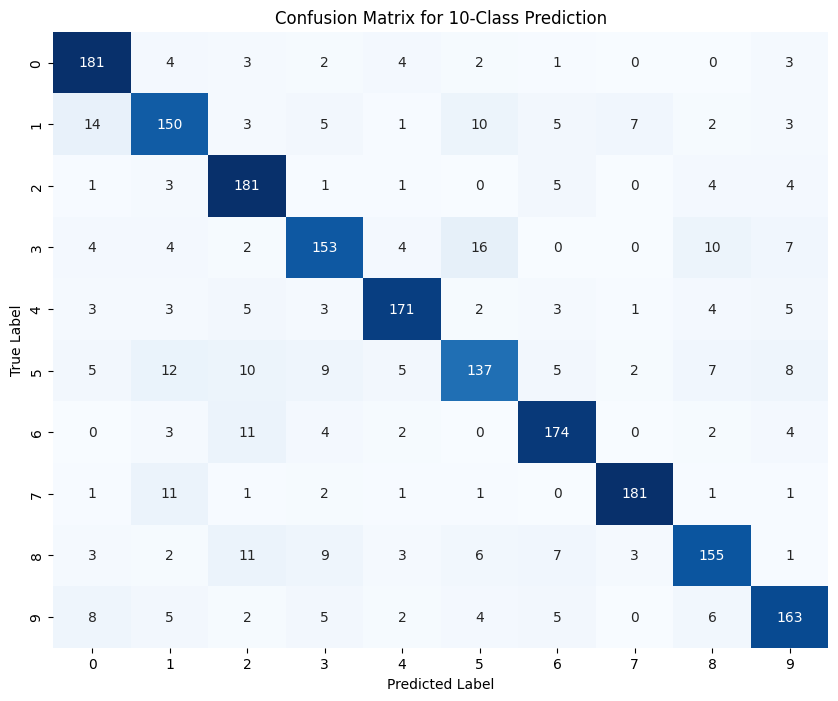

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=[str(i) for i in range(10)],
yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for 10-Class Prediction')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_macro = f1_score(all_labels,all_preds, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.8220831562003742


In [ ]:
from sklearn.metrics import f1_score
f1_macro = f1_score(lab,predicted, average='macro')
print(f"Macro F1 Score: {f1_macro}")

Macro F1 Score: 0.7807142857142857


In [ ]:
# After training, save the model's state dictionary
torch.save(model.state_dict(), 'tuned_model.pth')

In [ ]:
from google.colab import files

# Replace 'your_model.pth' with the actual filename and path
files.download('/content/tuned_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

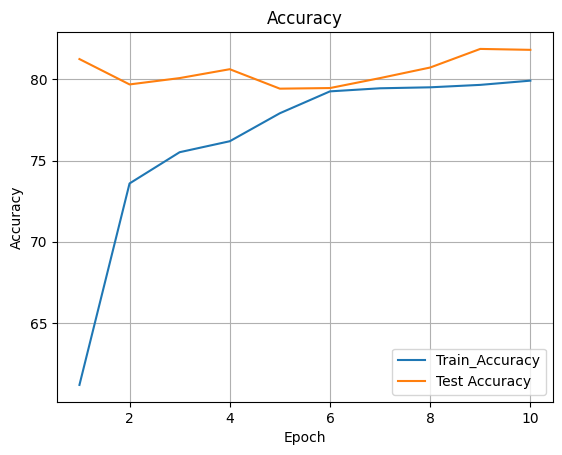

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = epochs = range(1,11)
plt.plot(epochs,train_Accuracy,label='Train_Accuracy')
epochs = range(1, 11)
plt.plot(epochs, test_accuracy[1:11],label='Test Accuracy')
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

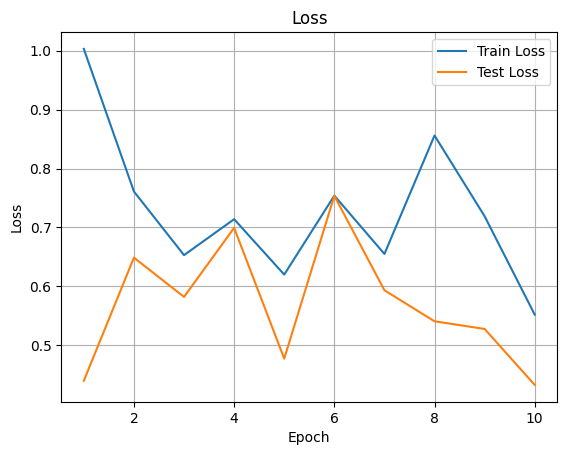

In [ ]:
epochs = epochs = range(1, len(runn_loss) + 1)
plt.plot(epochs,runn_loss,label='Train Loss')
epochs = range(1, 11)
plt.plot(epochs, test_loss[:10],label='Test Loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def denormalize_image(image_tensor):
    """
    Reverses the ImageNet normalization for plotting.
    Assumes image_tensor is a PyTorch tensor with shape [C, H, W] and values in float.
    """
    # Create a copy of the tensor
    denorm_image = image_tensor.clone()

    # Denormalize each channel
    for c in range(3):
        denorm_image[c].mul_(std[c]).add_(mean[c])

    # Clip values to the valid [0, 1] range (optional, but good practice)
    denorm_image = np.clip(denorm_image.numpy(), 0, 1)

    # Transpose from [C, H, W] to [H, W, C] for Matplotlib
    denorm_image = np.transpose(denorm_image, (1, 2, 0))

    return denorm_image



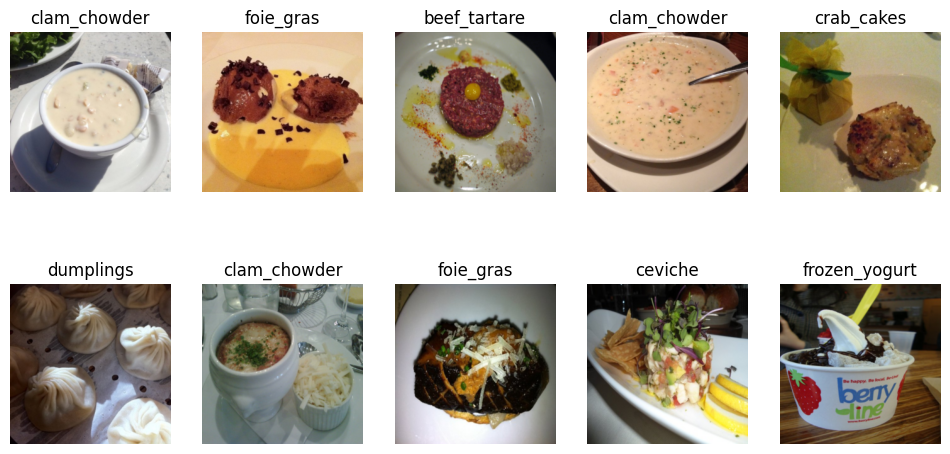

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  x=denormalize_image(inputs[i])
  plt.imshow(x)
  plt.title(test_data.classes[pred[i].item()])
  plt.axis('off')


In [ ]:
inputs[1][0]

tensor([[-0.4226, -0.4739, -0.6109,  ...,  0.3994,  0.3823,  0.3138],
        [-0.8678, -0.9534, -1.1075,  ...,  0.4166,  0.3994,  0.3481],
        [-1.4329, -1.4158, -1.5357,  ...,  0.4508,  0.4337,  0.3481],
        ...,
        [ 0.5536,  0.2111, -0.1999,  ...,  0.8104,  0.8276,  0.8104],
        [-0.7650, -0.8849, -0.8849,  ...,  0.7419,  0.7762,  0.8104],
        [-0.6794, -0.4226, -0.1486,  ...,  0.6906,  0.7077,  0.7419]])

In [ ]:
image_path='/content/image_dataset/test/chocolate_mousse/1014185.jpg'

In [ ]:
from PIL import Image
image = Image.open(image_path).convert('RGB')
input_tensor = test_preprocess(image)
input_batch = input_tensor.unsqueeze(0)

In [ ]:
output_class=model(input_batch)
_,predicted_class=torch.max(output_class,1)
train_data.classes[predicted_class.item()]


'chocolate_mousse'